kNN is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (eg distance function).
![Distance Formula](https://miro.medium.com/max/626/1*whWqafWqGnpM-_3SDEypPA.png)



![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Information of Dataset </font>

<b>The Banknote Authentication Dataset:</b> There are 1372 items (images of banknotes — think Euro or dollar bill). There are 4 predictor variables (variance of image, skewness, kurtosis, entropy). The variable to predict is encoded as 0 (authentic) or 1 (forgery). https://archive.ics.uci.edu/ml/datasets/banknote+authentication

Nous allons travailler sur un DataSet qui stockent des données sur l'authentification ou la falsification de billets de banque. Les données ont été extraites d'images provenant de billets authentiques et falsifiés ressemblant à des billets de banque. On a dans ces données quatres colonnes représentant quelques caractéristiques de ces images, la variance de l'image, l'asymétrie, la courbure ainsi que l'entropie. On a en cinquième colonne, la classification de ce billet, si il est authentique ou falsifié.

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue>Import the Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

Nous importons les librairies qui vont nous être utiles dans ce TP, comme numpy, pandas, etc... .

#### <font color = blue>Import the Dataset

In [ ]:
col_names = ['Variance of Image', 'Skewness', 'Kurtosis', 'Entropy', 'Class']
df = pd.read_table('data_banknote_authentication.txt', sep = ',', header = None, names = col_names)
df.tail(3)

,Variance of Image,Skewness,Kurtosis,Entropy,Class
1369,-3.7503,-13.45860,17.5932,-2.7771,1
1370,-3.5637,-8.38270,12.3930,-1.2823,1
1371,-2.5419,-0.65804,2.6842,1.1952,1


Nous importons notre DataSet à partir du fichier 'data_banknote_authentification.txt', en nommant nos 5 colonnes. Nous aperçevons ici les 3 dernières lignes de notre DataSet.

In [ ]:
df

,Variance of Image,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Data Summary and Visualization </font>

#### <font color = blue>Data Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Variance of Image  1372 non-null   float64
 1   Skewness           1372 non-null   float64
 2   Kurtosis           1372 non-null   float64
 3   Entropy            1372 non-null   float64
 4   Class              1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


Nous affichons les infos de notre DataSet ici, nous pouvons voir qu'il possède 1372 ligne, 5 colonnes, chaque colonne est renseigné (ne possède pas de valeur manquante). Les 4 premières colonnes sont de types décimales, la dernière est de type int, qui correspond à la classe du billet.

#### <font color = blue> Visualize the whole dataset

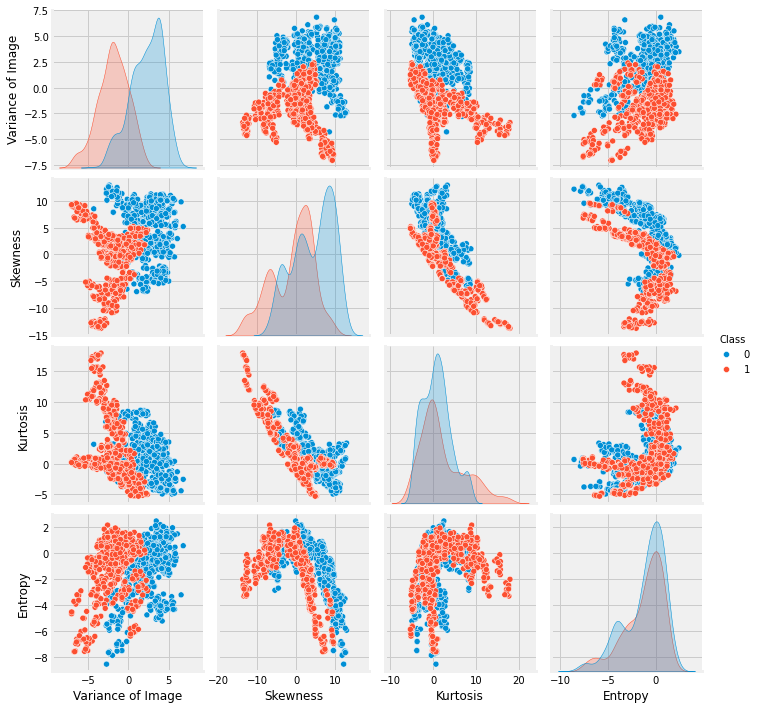

In [ ]:
plt.style.use('fivethirtyeight')
sns.pairplot(df, hue = 'Class')

Les graphiques nous permettent de voir comment les données dans le DataFrame sont structurées et comment les différentes colonnes interagissent les unes avec les autres. Pour résumer, nos données peuvent appartenir à deux classes, un billet authentique ou un billet faux. Ces billets, possèdent plusieurs attributs, qui sont nos 4 autres colonnes. En reliant ces colonnes et en créant ces graphiques, nous pouvons examiner des informations précieuses. Plus précisément, nous pouvons observer des tendances telles que la concentration des points d'une classe par exemple, en fonction des attributs séléctionnés mises en relations.

#### <font color = blue> Visualize the Label Class

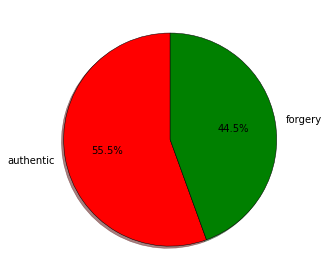

Authentiques : 762, Falsifications : 610


In [ ]:
authentic = df[df['Class'] == 0].shape[0]
forgery = df[df['Class'] == 1].shape[0]

label = [authentic, forgery]
plt.pie(label, labels = ['authentic', 'forgery'], shadow = True, wedgeprops = {'edgecolor': 'black'},
       autopct = '%1.1f%%', startangle = 90, colors = ['red', 'green'])
plt.tight_layout()
plt.show()

print("Authentiques : " + str(df[df['Class'] == 0].shape[0]) + ", Falsifications : ", end = "")
print(df[df['Class'] == 1].shape[0])

On compte ici le nombre de billet authentique et le nombre de faux billet. La classe 0 représente les billets authentiques, la classe 1, les billets faux. En dessinant un graphique en pourcentage, nous avons 55.5% de billets authentiques, 44.5 % de faux billets. Plus précisemment, nous avons 762 billets authentiques, 610 falsifications.

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Data Preprocessing </font>
In this part, we did data preprocessing. firstly, we define our predictor and target attribute. Then we oversee missing values because we found some missing values in the first three columns. To deal with the missing value we use Simple Imputer from sklearn and apply the mean strategy to our predictor data. After that, we apply Feature Scaling on our data as we know Feature Scaling is the most important part of data preprocessing. If we see our dataset, then some attribute has information in Numeric value some value is extremely high, and some are exceptionally low if we see the Variance of Image and Entropy. This will cause some issues in our machinery model to solve that problem we set all values on the same scale there are two methods to solve that problem and we use Standard Scaler. In the end, we split our data for training and testing. And ratio for training and testing is 0.8 and 0.2, respectively.
> Define Predictor and target <br> Attribute Dealing with Missing Value <br> Feature Scaling <br> Split the Data into Train and Test

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Define Predictor and target Attribute </font>

In [ ]:
X = df.iloc[:, :-1].to_numpy()
Y = df.iloc[:, -1].to_numpy()
print('predictor attribute', X)
print('target attribute', Y)

predictor attribute [[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
target attribute [0 0 0 ... 1 1 1]


On attribue à X une liste qui contient pour chaque ligne, une liste, comportant les quatres premières colonnes qui correspond aux caractéristiques du billet. On attribue à Y, une liste, qui comporte la classe de chaque ligne (billet).

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46> Dealing with Missing Value </font>

#### <font color = blue> Check the Missing Value

Variance of Image    3
Skewness             1
Kurtosis             2
Entropy              0
Class                0
dtype: int64

In [ ]:
df.isnull().sum()

Variance of Image    0
Skewness             0
Kurtosis             0
Entropy              0
Class                0
dtype: int64

On compte par colonne le nombre de valeurs manquantes. IL NOUS EN MANQUE AUCUNE.

#### <font color = blue> Apply Mean Strategy to Handle Missing Value

In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
imputer  = imputer.fit(X)
X = imputer.transform(X)
X

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

On applique la stratégie de la moyenne pour remplacer les valeurs manquantes dans les colonnes. Si il manque par exemple une valeur dans la colonne 1, on calcule la moyenne de toutes les valeurs présentes dans cette colonne, et on viens la placer à l'endroit ou la valeur est manquante.

### <font color = #27C3E5> 2.3: </font> <font color = #41EA46> Feature Scaling </font>

In [ ]:
sc_X = StandardScaler()



array([[ 1.12443818,  1.14917295, -0.97587762,  0.35456135],
       [ 1.4499974 ,  1.06412906, -0.89492756, -0.12876744],
       [ 1.21052135, -0.7785795 ,  0.12253144,  0.61807317],
       ...,
       [-1.47211061, -2.62377781,  3.76006109, -0.75488418],
       [-1.4063859 , -1.7581787 ,  2.55284418, -0.04315848],
       [-1.04648498, -0.44088347,  0.29896404,  1.1364645 ]])

In [ ]:
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)
X_scaled

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

On effectue maintenant de la strandardisation, afin de mettre toutes les caractéristiques à la même échelle, ce qui est important pour de nombreux algorithmes d'apprentissage automatique qui sont sensibles à l'échelle des caractéristiques. On utilise pour cela la classe StandardScaler de la bibliothèque scikit-learn.

### <font color = #27C3E5> 2.4: </font> <font color = #41EA46> Split the Data into Train (80%) and (20%) Test </font>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

On effectue ici la division de nos données en un ensemble d'entraînement (train) et un ensemble de test. 80% des données seront utilisés pour l'apprentissage, et 20% pour les tests.

#### <font color = blue> Training Data

In [ ]:
print("X_train", X_train.shape)
print("Y_train", y_train.shape)

X_train (1097, 4)
Y_train (1097,)


On obtiens donc 1097 lignes pour l'apprentissage et 4 colonnes pour chaque ligne concernant les caractéristiques, et 1097 valeurs concernant la variable cible.

#### <font color = blue> Testing Data

In [ ]:
print("X_test", X_test.shape)
print("Y_test", y_test.shape)

X_test (275, 4)
Y_test (275,)


On obtiens ici 275 lignes pour la phase de tests et 4 colonnes pour chaque ligne concernant les caractéristiques, et 275 valeurs concernant la variable cible.

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 3: </font> <font color = #4854E8> Build k-Nearest Neighbors </font>
In this part, we build k-Nearest Neighbors from scratch and with sklearn as well.

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 3.2: </font> <font color = #41EA46> Implementation with Scikit-Learn </font>

#### <font color = blue> Import Model from Scikit-learn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

On importe la classe KNeighborsClassifier depuis scikit-learn.

#### <font color = blue> Initialize the Model

In [ ]:
# knn_Sklearn = KNeighborsClassifier(n_neighbors= x, metric= '', p= 2)
knn_Sklearn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
# Avec k = 1 et k = 10, c'est pareil, on obtiens les mêmes résultats sur tout ce qui suis.

On initialise notre modèle kNN pour la classification, en utilisant les 3 voinsins les plus proches pour la prédiction en utilisant la distance euclidienne.

#### <font color = blue> Fit the Training Data into Model

In [ ]:
knn_Sklearn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

La méthode fit appliqué à notre modèle, elle prend en entrée X_train, qui sont les caractéristiques de l'ensemble d'entraînement, et y_train, qui sont les étiquettes (valeurs cibles) correspondantes à ces caractéristiques. Le modèle utilise ces données pour apprendre à prédire les valeurs cibles à partir des caractéristiques.

#### <font color = blue> Predict the Test Data</font>

In [ ]:
Y_predict_Sklearn = knn_Sklearn.predict(X_test)


array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [ ]:
Y_predict_Sklearn = knn_Sklearn.predict(X_test)
Y_predict_Sklearn

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1])

On obtiens ici la phase de test (de prédiction) suite à notre apprentissage. Nous allons maintenant comparer aux vrais valeurs pour voir le taux de réussite de notre modéle.

In [ ]:
y_test

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1])

Voici nos vrais cibles.

#### <font color = blue> Accuracy Score</font>

In [ ]:
score = accuracy_score(Y_predict_Sklearn, y_test)
print('Accuracy Score:', score)

Accuracy Score: 1.0


Nous obtenons un score de 1, donc 100% de réussite, avec k = 1, k = 3, k = 10. D'un coté cela parrait top, mais d'un autre suspect, cela peut indiquer un surajustement (overfitting) du modèle aux données d'entraînement, ce qui signifie que le modèle peut ne pas généraliser correctement à de nouvelles données.

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Evaluate the Result </font>
In this part, we evaluate the k-Nearest Neighbors Scratch model (it's doesn't matter because 100% result from both implementation). first we make confusion matrix and we visualize the score following ("Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error" and "Roc Area").

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 4.1: </font> <font color = #41EA46> Confusion Matrix</font>

<Axes: >

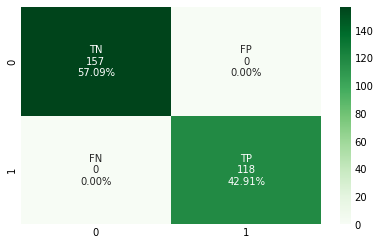

In [ ]:
'''
Ici on créer une matrice de confusion pour évaluer les performances de notre modéle kNN.
La matrice de confusion obtenue contient quatre valeurs :

Le nombre de vrais positifs (True Positives, TP).
Le nombre de faux positifs (False Positives, FP).
Le nombre de vrais négatifs (True Negatives, TN).
Le nombre de faux négatifs (False Negatives, FN).

# Ces valeurs permettent d'évaluer la performance de notre modèle en termes de classification correcte et
# d'erreurs de classification.
'''
confusion_matrix_= confusion_matrix(Y_predict_Sklearn, y_test)

# On récupére ces fameuses 4 valeurs
#[row, column]
TP = confusion_matrix_[1, 1]
TN = confusion_matrix_[0, 0]
FP = confusion_matrix_[0, 1]
FN = confusion_matrix_[1, 0]

# On nomme les différents groupes comme décrit précedemment
group_names = ['TN','FP','FN','TP']

'''
On applatie ici la matrice pour la transformer en vecteur, et on formatte chaque valeur pour que ce soit
un nombre à virgule sans décimale.
L'objectif de cette ligne de code est de convertir les valeurs de la matrice de confusion en chaînes de caractères
formatées de manière à ce qu'elles puissent être facilement intégrées à un affichage de résultats.
'''
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_.flatten()]

'''
On calcule et formate les pourcentages des valeurs de la matrice de confusion par rapport au total de la matrice.
'''
group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_.flatten()/np.sum(confusion_matrix_)]

# Cette ligne de code crée des étiquettes (labels) en combinant les noms,
# les valeurs et les pourcentages des éléments de la matrice de confusion.
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

'''
Cette ligne de code prend la liste des étiquettes labels créée précédemment,
la transforme en un tableau NumPy et la remodèle pour qu'elle ait une structure 2x2,
ce qui signifie qu'elle organise les étiquettes en une matrice 2x2 pour qu'elles puissent
être utilisées dans le contexte de l'affichage.
'''
labels = np.asarray(labels).reshape(2,2)

'''
Cette ligne de code crée une carte de chaleur (heatmap) en utilisant Seaborn
pour visualiser la matrice de confusion. La matrice de confusion contient les valeurs pour
évaluer les performances de notre modéle, et cette carte aide à visualiser ces
valeurs à l'aide de couleurs
'''
sns.heatmap(confusion_matrix_, annot=labels, fmt='', cmap='Greens')

### <font color = #27C3E5> 4.2: </font> <font color = #41EA46>  Evaluate the Results </font>

#### <font color = blue>4.2.1: Calculate the Results

In [ ]:
# Accuracy Score
'''
Cette ligne calcule le score de précision (Accuracy) en comparant
les prédictions Y_predict_ avec les vraies valeurs y_test.
Le score d'exactitude mesure le nombre de prédictions correctes par rapport à l'ensemble de test.
'''
Accuracy = accuracy_score(Y_predict_Sklearn, y_test)
print('Accuracy Score:', Accuracy)

# Precision Score
'''
Cette ligne calcule le score de précision (Precision) qui mesure la
proportion de vrais positifs parmi toutes les prédictions positives.
Il évalue la capacité du modèle à classifier correctement les exemples positifs.
'''
Precision = precision_score(Y_predict_Sklearn, y_test)
print('Precision Score:', Precision)

# True positive Rate (TPR) or Sensitivity or Recall
'''
Cette ligne calcule le taux de vrais positifs (True Positive Rate, TPR) ou le rappel.
Il mesure la capacité du modèle à identifier correctement les exemples positifs
parmi tous les exemples réels positifs.
'''
TPR = recall_score(Y_predict_Sklearn, y_test)
print('True positive Rate:', TPR)

# False positive Rate (FPR)
'''
Cette ligne calcule le taux de faux positifs (False Positive Rate, FPR).
Il représente la proportion d'exemples négatifs incorrectement classés comme positifs parmi tous
les exemples réels négatifs.
'''
FPR = FP / float(TN + FP)
print('False positive Rate', FPR)

# F1 Score or F-Measure or F-Score
'''
Cette ligne calcule le score F1, qui est une mesure de la précision et du rappel combinés.
Il permet d'évaluer l'équilibre entre la précision et le rappel du modèle.
'''
F1 = f1_score(Y_predict_Sklearn, y_test)
print('F1 Score:', F1)

# Specificity
'''
Cette ligne calcule la spécificité du modèle,
qui mesure la proportion d'exemples négatifs correctement classés parmi tous les exemples réels négatifs.
'''
Specificity = TN / (TN + FP)
print('Specificity:', Specificity )

# Mean Absolute Error
'''
Cette ligne calcule l'erreur moyenne absolue entre les prédictions et les vraies valeurs.
Il mesure l'écart moyen entre les prédictions du modèle et les vraies valeurs.
'''
Error = mean_absolute_error(Y_predict_Sklearn, y_test)
print('Mean Absolute Error:', Error)

# ROC Area
'''
Cette ligne calcule l'aire sous la courbe ROC (Receiver Operating Characteristic)
pour évaluer la capacité du modèle à discriminer entre les classes.
Une valeur plus élevée de l'aire sous la courbe ROC indique de meilleures performances de classification.
'''
Roc = roc_auc_score(Y_predict_Sklearn, y_test)
print('ROC Area:', Roc)

Accuracy Score: 1.0
Precision Score: 1.0
True positive Rate: 1.0
False positive Rate 0.0
F1 Score: 1.0
Specificity: 1.0
Mean Absolute Error: 0.0
ROC Area: 1.0


#### <font color = blue>4.2.2: Visualize the Results

<BarContainer object of 8 artists>

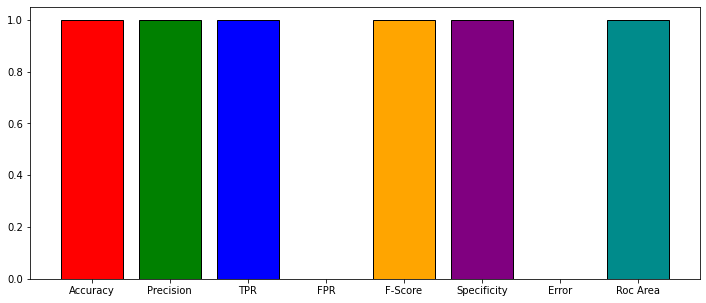

In [ ]:
plt.figure(figsize = (12, 5))

result = [Accuracy, Precision, TPR, FPR, F1, Specificity, Error, Roc]
label = ["Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error", "Roc Area"]
colors=[ 'red', 'green', 'blue', 'darkgoldenrod', 'orange', 'purple', 'brown', 'darkcyan']

plt.bar(label, result, color = colors, edgecolor='black')

# Cela permet de visualiser facilement la performance du modèle pour différentes métriques à l'aide d'un graphique.

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 5: </font> <font color = #4854E8> Making A Single Prediction </font>
In this part, we make a single Prediction based on new observation

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [ ]:
col = ['Variance of Image', 'Skewness', 'Kurtosis', 'Entropy', 'Class']
pd.DataFrame([[3.1111, 8.8282, 4.111, -2.34422, '?']], columns =col)

# On crée ici une nouvelle dataframe qui contient une ligne,
# avec des certaines valeurs.
# Le '?' pour la classe, est une valeur de remplissage ou inconnue,
# souvent utilisée pour indiquer une valeur manquante ou une valeur à prédire.

,Variance of Image,Skewness,Kurtosis,Entropy,Class
0,3.1111,8.8282,4.111,-2.34422,?


In [ ]:
new_prediction = knn_Sklearn.predict(sc_X.transform(np.array([[3.1111, 8.8282, 4.111, -2.34422]])))

# On utilise notre modéle kNN pour effectuer une prediction de la classe de cette ligne de ce nouveau dataframe.

In [ ]:
if new_prediction == 1:
    print("forgery")
else:
    print("authentic")

# On obtiens un billet authentique, ce qui semble être la bonne prédiction.

authentic


![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)